<a href="https://colab.research.google.com/github/soujanya-vattikolla/MongoDB-basics/blob/main/Knearestneighborsclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise:

From sklearn.datasets load digits dataset and do following

1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv

2. Plot confusion matrix

3. Plot classification report

In [1]:
# import libraries

import pandas as pd
from sklearn.datasets import load_digits

In [4]:
digit_dataset = load_digits()

In [5]:
dir(digit_dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
# create a dataframe

digit_df = pd.DataFrame(digit_dataset.data, digit_dataset.target)
digit_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [8]:
# creating a target column

digit_df['target'] = digit_dataset['target']
digit_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [9]:
# Train test split

from sklearn.model_selection import train_test_split

In [11]:
X = digit_df.drop('target',axis='columns')
y = digit_df['target']

In [12]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
len(X_train)

1257

In [15]:
len(X_test)

540

Create KNN (K Neighrest Neighbour Classifier)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [21]:
knn.score(X_test,y_test)

0.9888888888888889

In [22]:
# trying with K = 5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9907407407407407

We can see that k=5, it is giving a good score of 99%

Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [26]:
y_pred = knn.predict(X_test)
confmat = confusion_matrix(y_test, y_pred)
confmat

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 64,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 56]])

Text(42.0, 0.5, 'Truth')

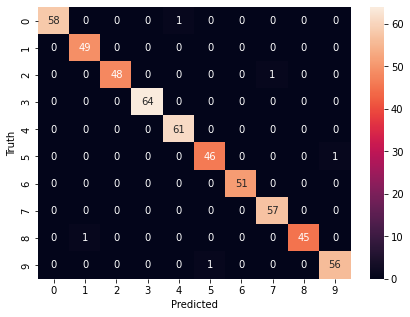

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7,5))
sns.heatmap(confmat,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

From this heatmap, we can see that maximum number of times it predicted correctly.

In [28]:
from sklearn.metrics import classification_report

In [29]:
# classification report for precssion, recall and f1-score for each classes

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        49
           2       1.00      0.98      0.99        49
           3       1.00      1.00      1.00        64
           4       0.98      1.00      0.99        61
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        51
           7       0.98      1.00      0.99        57
           8       1.00      0.98      0.99        46
           9       0.98      0.98      0.98        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

